# The control of human psycho-affective stability using differential equations

In [244]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import sympy as sp

# Functions 

### Define the system

In [228]:
def romeo_juliet_system(t, variables, a, b, c, d):
    """
    Defines the linear system modeling Romeo and Juliet's emotions.
    dx/dt = a*x + b*y
    dy/dt = c*x + d*y
    """
    x, y = variables
    dxdt = a * x + b * y
    dydt = c * x + d * y
    return [dxdt, dydt]

### Equilibrium and stability computations

In [229]:
def analyze_stability(a, b, c, d):
    """
    Computes determinant, Jacobian, eigenvalues, interprets stability
    (Stable/Unstable + node, spiral, center, saddle, degenerate),
    and prints the symbolic solution (x(t) = ..., y(t) = ...).
    """
    # --- Matrice Jacobienne ---
    J = np.array([[a, b], [c, d]])
    delta = a * d - b * c
    eigenvalues, eigenvectors = np.linalg.eig(J)

    print(f"Jacobian:\n{J}")
    print(f"Determinant Δ = {delta:.2f}")
    if delta != 0:
        print("→ One unique equilibrium point: (0, 0)")
    else:
        print("→ Infinite or no equilibrium points (det(A)=0).")

    print(f"Eigenvalues = {eigenvalues}\n")

    # --- CLASSIFICATION COMPLÈTE ---
    # Valeurs propres réelles ou complexes
    if np.iscomplex(eigenvalues).any():
        # Valeurs propres complexes conjuguées
        real_part = np.real(eigenvalues[0])
        imag_part = np.imag(eigenvalues[0])

        if np.isclose(real_part, 0, atol=1e-8) and not np.isclose(imag_part, 0, atol=1e-8):
            stability = "Center (neutral oscillations)"
        elif real_part < 0:
            stability = "STABLE spiral"
        elif real_part > 0:
            stability = "UNSTABLE spiral"
        else:
            stability = "Oscillatory (indeterminate)"
    else:
        # Eigenvalues
        λ1, λ2 = np.real(eigenvalues[0]), np.real(eigenvalues[1])

        if np.isclose(λ1, λ2, atol=1e-8):  
            if λ1 < 0:
                stability = "STABLE degenerate node"
            elif λ1 > 0:
                stability = "UNSTABLE degenerate node"
            else:
                stability = "Neutral degenerate node (λ = 0)"
        elif λ1 < 0 and λ2 < 0:
            stability = "STABLE node"
        elif λ1 > 0 and λ2 > 0:
            stability = "UNSTABLE node"
        elif λ1 * λ2 < 0:
            stability = "SADDLE point (unstable)"
        else:
            stability = "Indeterminate case"

    print(f"→ Stability type: {stability}\n")

    # --- symbolic solution using sympy ---
    print("🔹 Symbolic solution (using sympy):")

    t = sp.Symbol('t', real=True)
    x = sp.Function('x')(t)
    y = sp.Function('y')(t)

    eq1 = sp.Eq(sp.diff(x, t), a*x + b*y)
    eq2 = sp.Eq(sp.diff(y, t), c*x + d*y)

    try:
        sol = sp.dsolve([eq1, eq2])
        for s in sol:
            lhs = str(s.lhs)
            rhs = sp.simplify(s.rhs)
            print(f"{lhs} = {rhs}")
    except Exception as e:
        print("  Could not compute symbolic solution automatically.")
        print("  Error:", e)

    return stability

### Function to modelise/simulate

In [230]:
def simulate_system(a, b, c, d, x0, y0):
    """
    Solves the system numerically 
    """
    t_span = (0, 100)
    t_eval = np.linspace(*t_span, 500)
    sol = solve_ivp(romeo_juliet_system, t_span, [x0, y0], args=(a, b, c, d), t_eval=t_eval)
    print(f"Solution at time 100: x(100)={sol.y[0, -1]:.3f}, y(100)={sol.y[1, -1]:.3f}")
    return sol

### The function to plot

In [231]:
def plot_evolution(sol, title):
    """
    Plots the emotional evolution of Romeo and Juliet over time.
    """
    plt.figure(figsize=(7, 4))
    plt.plot(sol.t, sol.y[0], label="Romeo (x)", color='blue')
    plt.plot(sol.t, sol.y[1], label="Juliet (y)", color='red')

    plt.xlabel("Time")
    plt.ylabel("Emotions")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## The function to plot plan phase

In [238]:
def plot_phase(a, b, c, d, title):
    """
    Tracé du portrait de phase complet (t > 0 et t < 0), rapide et propre.
    """
    box=0.2
    t_span = (0, 100)
    t_eval = np.linspace(*t_span, 250)
    eps = 1e-4
    points = np.linspace(-box, box, 6)

    initials = [
        (x + np.random.uniform(-eps, eps),
         y + np.random.uniform(-eps, eps))
        for x in points for y in points
        if abs(x) > 0.01 or abs(y) > 0.01
    ]

    plt.figure(figsize=(6, 6))

    for x_init, y_init in initials:
        sol_fwd = solve_ivp(romeo_juliet_system, t_span, [x_init, y_init],
                            args=(a, b, c, d), t_eval=t_eval,
                            rtol=1e-8, atol=1e-8)
        plt.plot(sol_fwd.y[0], sol_fwd.y[1], color='b', lw=1.2)

        sol_bwd = solve_ivp(romeo_juliet_system, (0, -200), [x_init, y_init],
                            args=(a, b, c, d), t_eval=-t_eval,
                            rtol=1e-8, atol=1e-8)
        plt.plot(sol_bwd.y[0], sol_bwd.y[1], color='b', lw=1.2)

    plt.scatter(0, 0, color='black', s=50, label='Equilibrium')
    plt.legend(loc="upper right", frameon=True, facecolor='white')
    plt.xlim(-box, box)
    plt.ylim(-box, box)
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)
    plt.title(title)
    plt.gca().set_aspect("equal")
    plt.tight_layout()
    plt.show()

### THE function

In [245]:
def run_scenario(name, a, b, c, d, x0, y0, box=0.2):
    """
    Runs one full scenario: stability + simulation + plot.
    """
    print("\n----------------------------------------")
    print(f"SCENARIO: {name}")
    print(f"Parameters: a={a}, b={b}, c={c}, d={d}")
    
    stability = analyze_stability(a, b, c, d)
    
    sol = simulate_system(a, b, c, d, x0, y0)
    
    plot_evolution(sol, f"{name}")
    plot_phase(a, b, c, d, f"{name} - Phase Portrait - {stability}")

How to use it : copy and paste the following code :


In [234]:
#scenarios = {
#    "scenario 1": (0, 0, 0, 0),
#    "scenario 2": (0, 0, 0, 0),
#    } # Add scenarios as needed

# Run them all
#for name, params in scenarios.items():
#    run_scenario(name, *params, x0=0.1, y0=0.1)

# Test

Parameters **_a_**, **_b_**, **_c_**, **_d_** quantify Romeo’s romantic style and Juliet's romantic style as follows :


- **_a_** --> how Romeo is encouraged by his feelings
- **_b_** --> how Romeo is encouraged by Juliet’s feelings.
- **_c_** --> how Juliet is encouraged by Romeo's feelings 
- **_d_** --> how Juliet is encouraged by her feelings


## Mutual and increasing love scenarios

As presented in figures 1 and 2 in the article, you will find below mutual and increasing love in which Romeo's feelings are a bit more intense. The important parameters here are **_b_** and **_c_**. In other words, this configuration can be obtain by using only the simple model. Here, we represent the (tres petite) discrepancy of feelings between Romeo and Juliette by setting **_b > c_**


----------------------------------------
SCENARIO: Figure 1
Parameters: a=0, b=0.2, c=0.05, d=0
Jacobian:
[[0.   0.2 ]
 [0.05 0.  ]]
Determinant Δ = -0.01
→ One unique equilibrium point: (0, 0)
Eigenvalues = [ 0.1 -0.1]

→ Stability type: SADDLE point (unstable)

🔹 Symbolic solution (using sympy):
x(t) = 2.0*(-C1 + C2*exp(0.2*t))*exp(-0.1*t)
y(t) = 1.0*(C1 + C2*exp(0.2*t))*exp(-0.1*t)
Solution at time 100: x(100)=3302.548, y(100)=1651.274


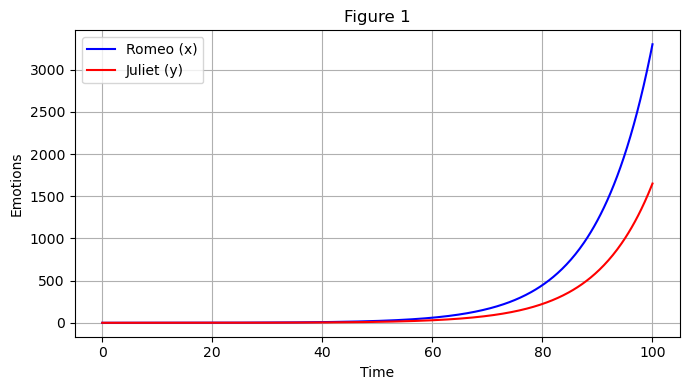

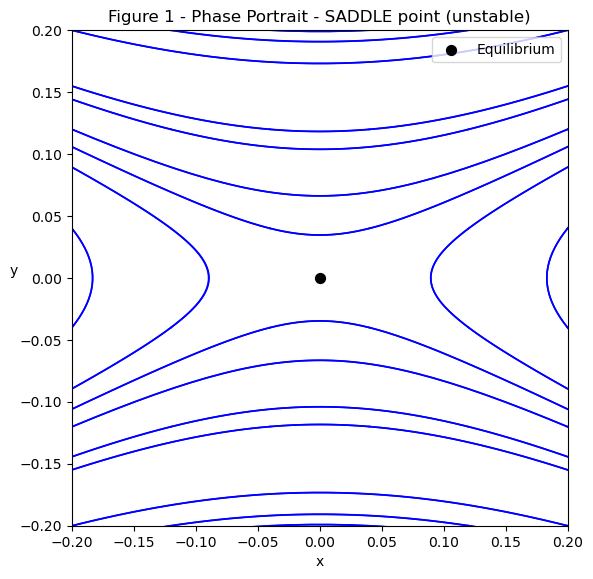


----------------------------------------
SCENARIO: Figure 2
Parameters: a=0, b=0.2, c=0.1, d=0
Jacobian:
[[0.  0.2]
 [0.1 0. ]]
Determinant Δ = -0.02
→ One unique equilibrium point: (0, 0)
Eigenvalues = [ 0.14142136 -0.14142136]

→ Stability type: SADDLE point (unstable)

🔹 Symbolic solution (using sympy):
x(t) = 1.4142135623731*(-C1 + C2*exp(0.282842712474619*t))*exp(-0.14142135623731*t)
y(t) = 1.0*(C1 + C2*exp(0.282842712474619*t))*exp(-0.14142135623731*t)
Solution at time 100: x(100)=167201.208, y(100)=118229.108


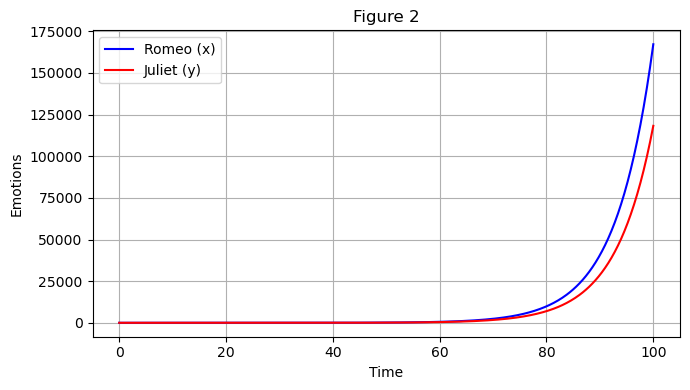

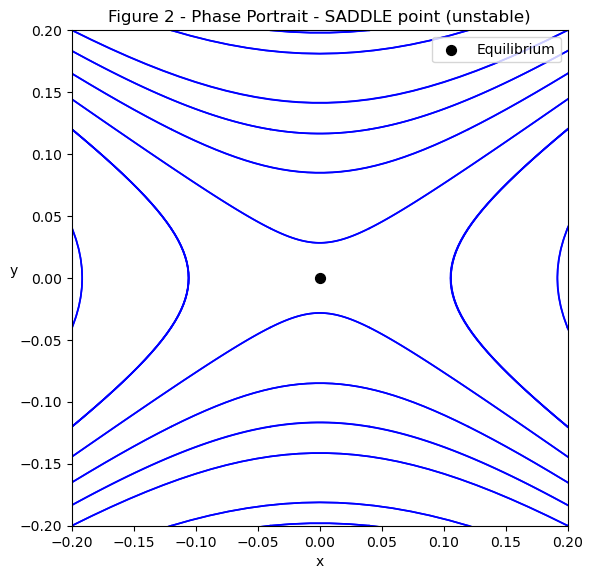


----------------------------------------
SCENARIO: Mutual and increasing love
Parameters: a=0, b=0.2, c=0.18, d=0
Jacobian:
[[0.   0.2 ]
 [0.18 0.  ]]
Determinant Δ = -0.04
→ One unique equilibrium point: (0, 0)
Eigenvalues = [ 0.18973666 -0.18973666]

→ Stability type: SADDLE point (unstable)

🔹 Symbolic solution (using sympy):
x(t) = 1.05409255338946*(-C1 + C2*exp(0.379473319220205*t))*exp(-0.189736659610103*t)
y(t) = 1.0*(C1 + C2*exp(0.379473319220205*t))*exp(-0.189736659610103*t)
Solution at time 100: x(100)=17833578.479, y(100)=16918418.048


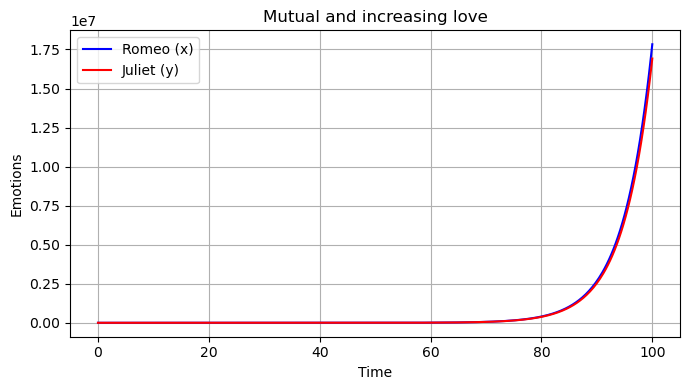

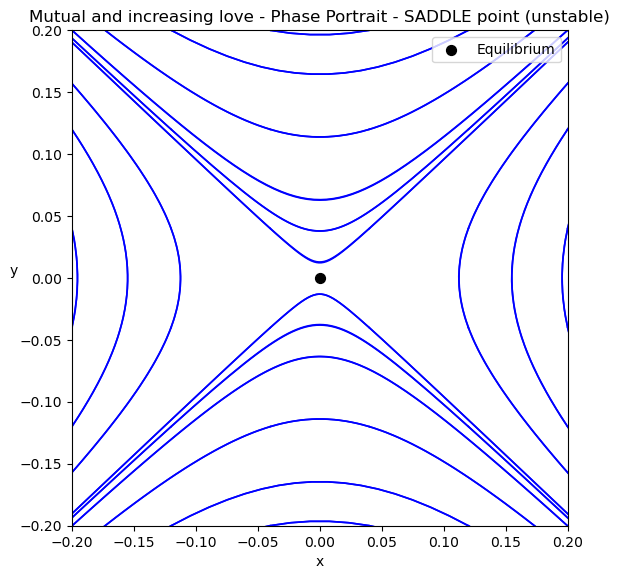


----------------------------------------
SCENARIO: case two
Parameters: a=1, b=1, c=1, d=1
Jacobian:
[[1 1]
 [1 1]]
Determinant Δ = 0.00
→ Infinite or no equilibrium points (det(A)=0).
Eigenvalues = [2. 0.]

→ Stability type: Indeterminate case

🔹 Symbolic solution (using sympy):
x(t) = -C1 + C2*exp(2*t)
y(t) = C1 + C2*exp(2*t)
Solution at time 100: x(100)=71096077577711794700717404459889341046053507827282561868265869810661888205368810536960.000, y(100)=71096077577711794700717404459889341046053507827282561868265869810661888205368810536960.000


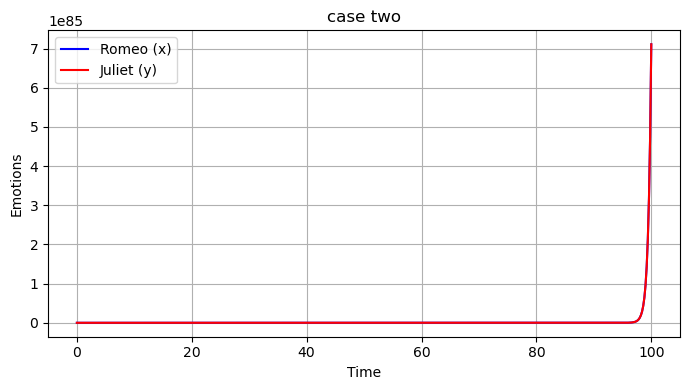

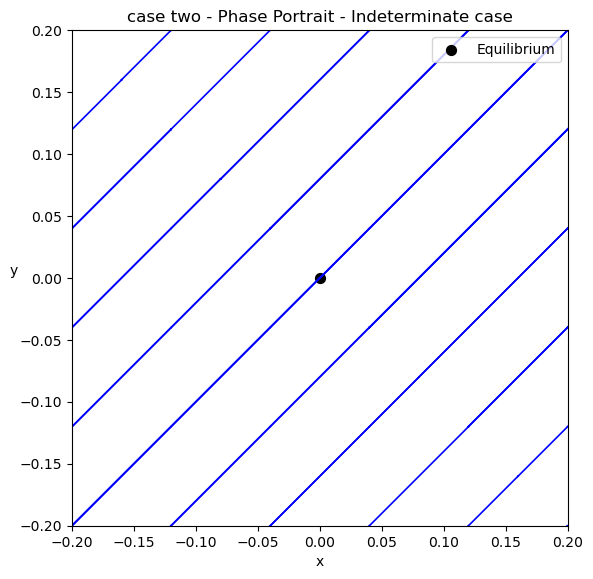

In [240]:
scenarios = {
    "Figure 1": (0, 0.2, 0.05, 0),
    "Figure 2": (0, 0.2, 0.1, 0),
    "Mutual and increasing love": (0, 0.2, 0.18, 0),
    "case two": (1, 1, 1, 1)
    }

# Run them all
for name, params in scenarios.items():
    run_scenario(name, *params, x0=0.1, y0=0.1)

## Rollercoaster relationship

In figure 3, we have an endless cycle of love versus strife. It is not very well represented in the article, so here is a version that is easier to see. 
To represent such relationship, we focus once again on **_b_** and **_c_**. We have to chose the parameter so one is positive and the other is negative.



----------------------------------------
SCENARIO: Figure 3
Parameters: a=0, b=0.5, c=-0.5, d=0
Jacobian:
[[ 0.   0.5]
 [-0.5  0. ]]
Determinant Δ = 0.25
→ One unique equilibrium point: (0, 0)
Eigenvalues = [0.+0.5j 0.-0.5j]

→ Stability type: Center (neutral oscillations)

🔹 Symbolic solution (using sympy):
x(t) = 1.0*C1*sin(0.5*t) + 1.0*C2*cos(0.5*t)
y(t) = 1.0*C1*cos(0.5*t) - 1.0*C2*sin(0.5*t)
Solution at time 100: x(100)=0.721, y(100)=1.216


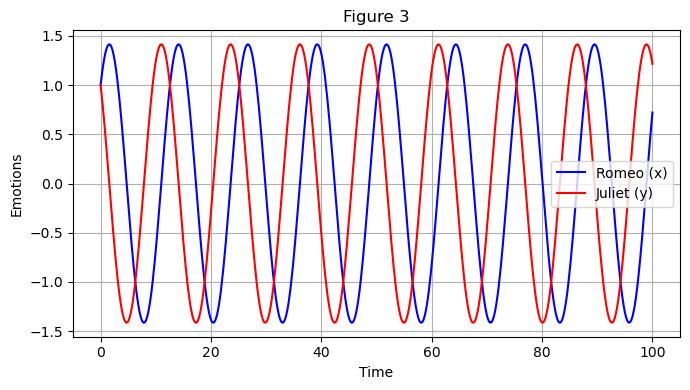

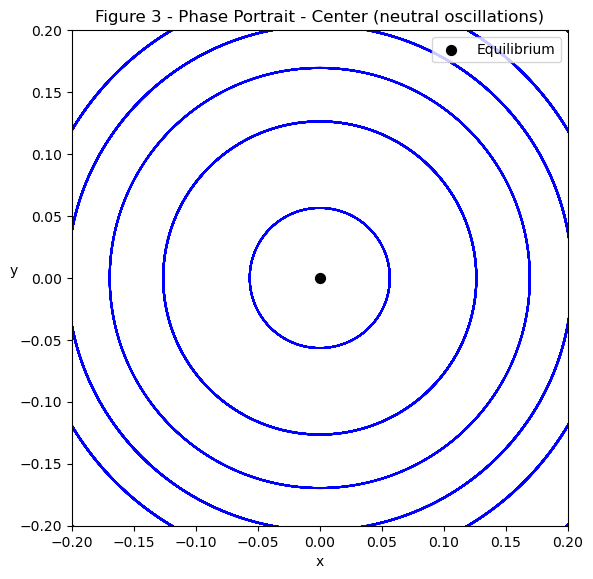

In [236]:
scenarios = {
    "Figure 3": (0, 0.5, -0.5, 0),
    }

# Run them all
for name, params in scenarios.items():
    run_scenario(name, *params, x0=1, y0=1)

## Unrequited love

Just like in figure 5.
Here, romeo follows his own feeling but is not influenced by those of juliet. Juliet react negativly to romeos love.


----------------------------------------
SCENARIO: Figure 5
Parameters: a=0, b=-0.1, c=-0.2, d=0
Jacobian:
[[ 0.  -0.1]
 [-0.2  0. ]]
Determinant Δ = -0.02
→ One unique equilibrium point: (0, 0)
Eigenvalues = [ 0.14142136 -0.14142136]

→ Stability type: SADDLE point (unstable)

🔹 Symbolic solution (using sympy):
x(t) = 0.707106781186548*(C1 - C2*exp(0.282842712474619*t))*exp(-0.14142135623731*t)
y(t) = 1.0*(C1 + C2*exp(0.282842712474619*t))*exp(-0.14142135623731*t)
Solution at time 100: x(100)=202873.111, y(100)=-286905.906


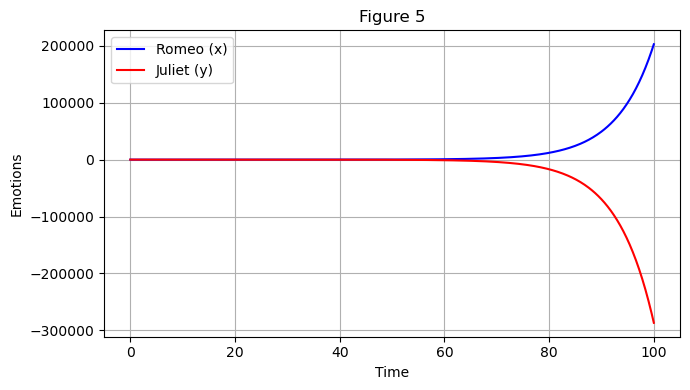

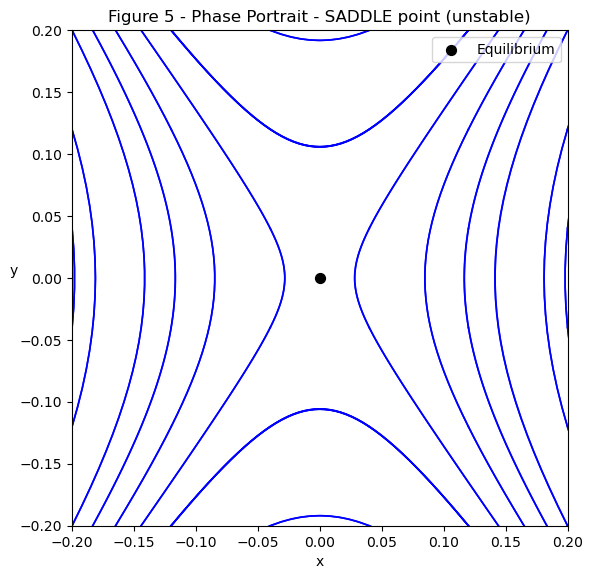


----------------------------------------
SCENARIO: case one
Parameters: a=-0.1, b=0, c=0, d=0.1
Jacobian:
[[-0.1  0. ]
 [ 0.   0.1]]
Determinant Δ = -0.01
→ One unique equilibrium point: (0, 0)
Eigenvalues = [-0.1  0.1]

→ Stability type: SADDLE point (unstable)

🔹 Symbolic solution (using sympy):
x(t) = 1.0*C1*exp(-0.1*t)
y(t) = 1.0*C2*exp(0.1*t)
Solution at time 100: x(100)=0.000, y(100)=22030.234


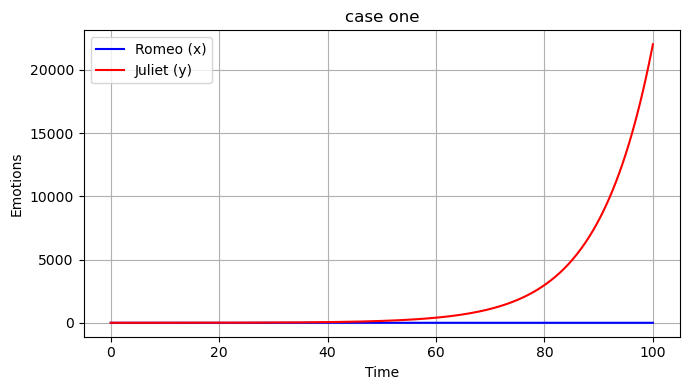

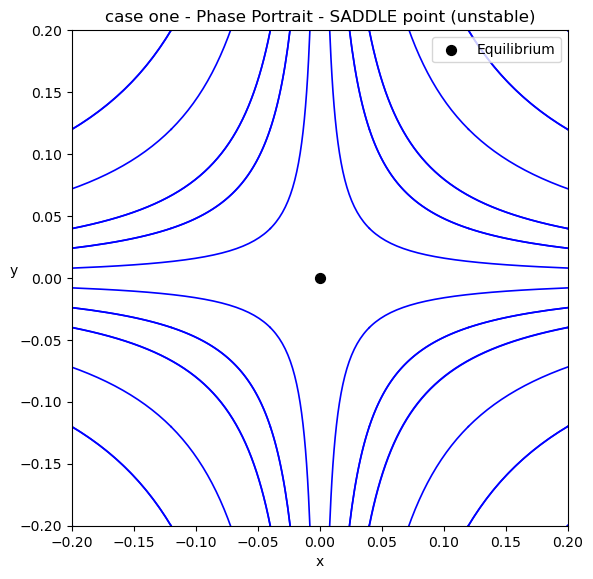

In [248]:
scenarios = {
    "Figure 5": (0, -0.1, -0.2, 0),
    "case one": (-0.1, 0, 0, 0.1)
    }

# Run them all
for name, params in scenarios.items():
    run_scenario(name, *params, x0=1, y0=1)

## Fading relationship

Like in figure 6, we have a cold relationship between the two lovers. 
Both romeo and juliette have a positive influence on eachothers feelings, but the way they don't listen to their own feelings takes over, and they fall apart, slowly.


----------------------------------------
SCENARIO: Figure 6
Parameters: a=-0.3, b=0.3, c=0.4, d=-0.5
Jacobian:
[[-0.3  0.3]
 [ 0.4 -0.5]]
Determinant Δ = 0.03
→ One unique equilibrium point: (0, 0)
Eigenvalues = [-0.03944487 -0.76055513]

→ Stability type: STABLE node

🔹 Symbolic solution (using sympy):
x(t) = -0.651387818865997*C1*exp(-0.760555127546399*t) + 1.151387818866*C2*exp(-0.0394448724536011*t)
y(t) = 1.0*C1*exp(-0.760555127546399*t) + 1.0*C2*exp(-0.0394448724536011*t)
Solution at time 100: x(100)=0.285, y(100)=0.247


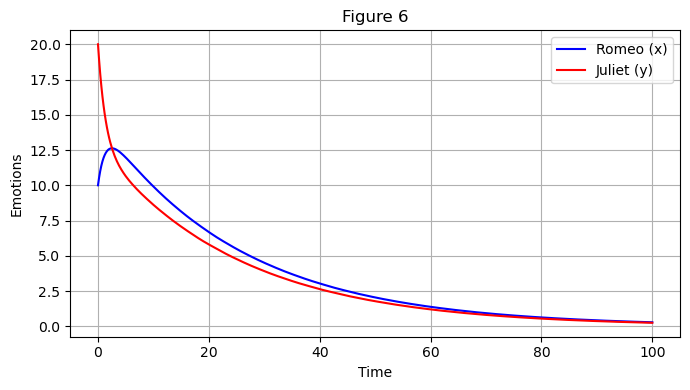

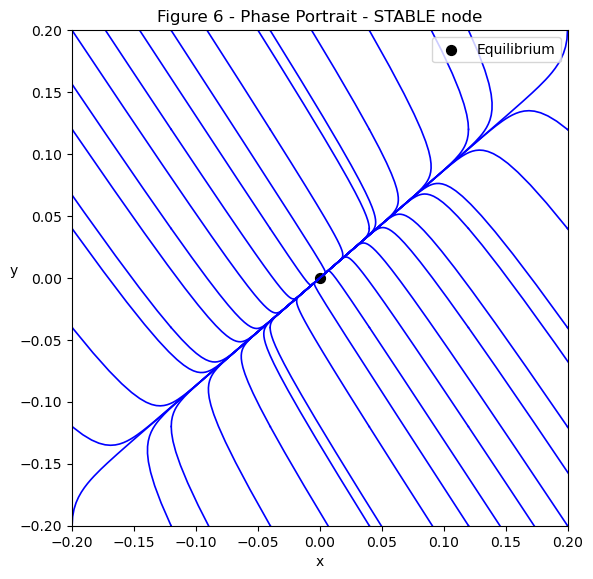

In [247]:
scenarios = {
    "Figure 6": (-0.3, 0.3, 0.4, -0.5)
    }

# Run them all
for name, params in scenarios.items():
    run_scenario(name, *params, x0=10, y0=20)

## A mutual and stable love



----------------------------------------
SCENARIO: a 'what could've been' love
Parameters: a=0, b=0, c=0, d=0
Jacobian:
[[0 0]
 [0 0]]
Determinant Δ = 0.00
→ Infinite or no equilibrium points (det(A)=0).
Eigenvalues = [0. 0.]

→ Stability type: Neutral degenerate node (λ = 0)

🔹 Symbolic solution (using sympy):
x(t) = C1
y(t) = C2
Solution at time 100: x(100)=10.000, y(100)=10.000


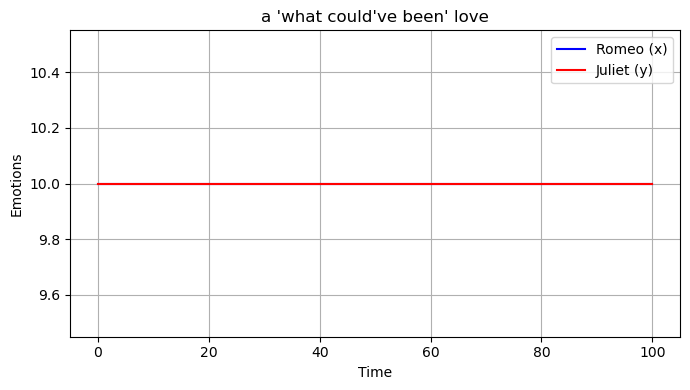

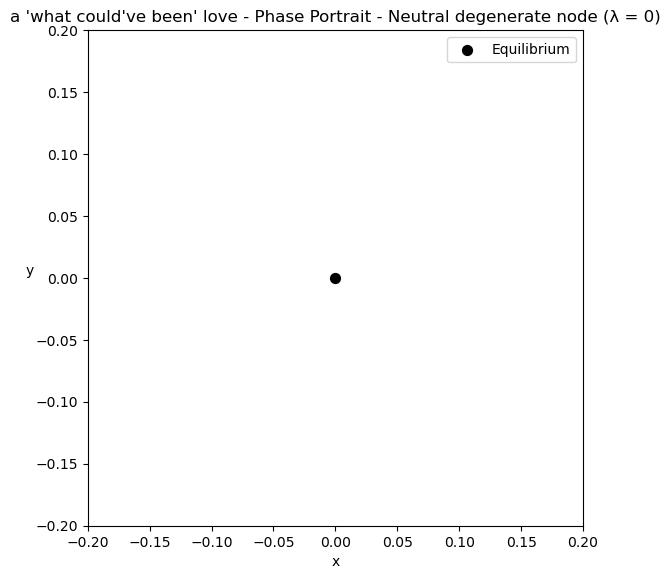

In [246]:
scenarios = {
    "a 'what could've been' love": (0,0,0,0)
    }

# Run them all
for name, params in scenarios.items():
    run_scenario(name, *params, x0=10, y0=10)